In [3]:
import pandas
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pandas.read_csv(uri_filmes)

filmes.columns = ['id', 'titulo', 'genero']

filmes.head()

,id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Pegando os dummies
generos = filmes.genero.str.get_dummies()

dados_dos_filmes = pandas.concat([filmes, generos], axis=1)

dados_dos_filmes.head()

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
print(generos_escalados)

[[-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 ...
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995  2.0807022  -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]]


/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos: {modelo.labels_}')

Grupos: [1 1 0 ... 0 1 0]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf00e1bf98>,
      dtype=object)

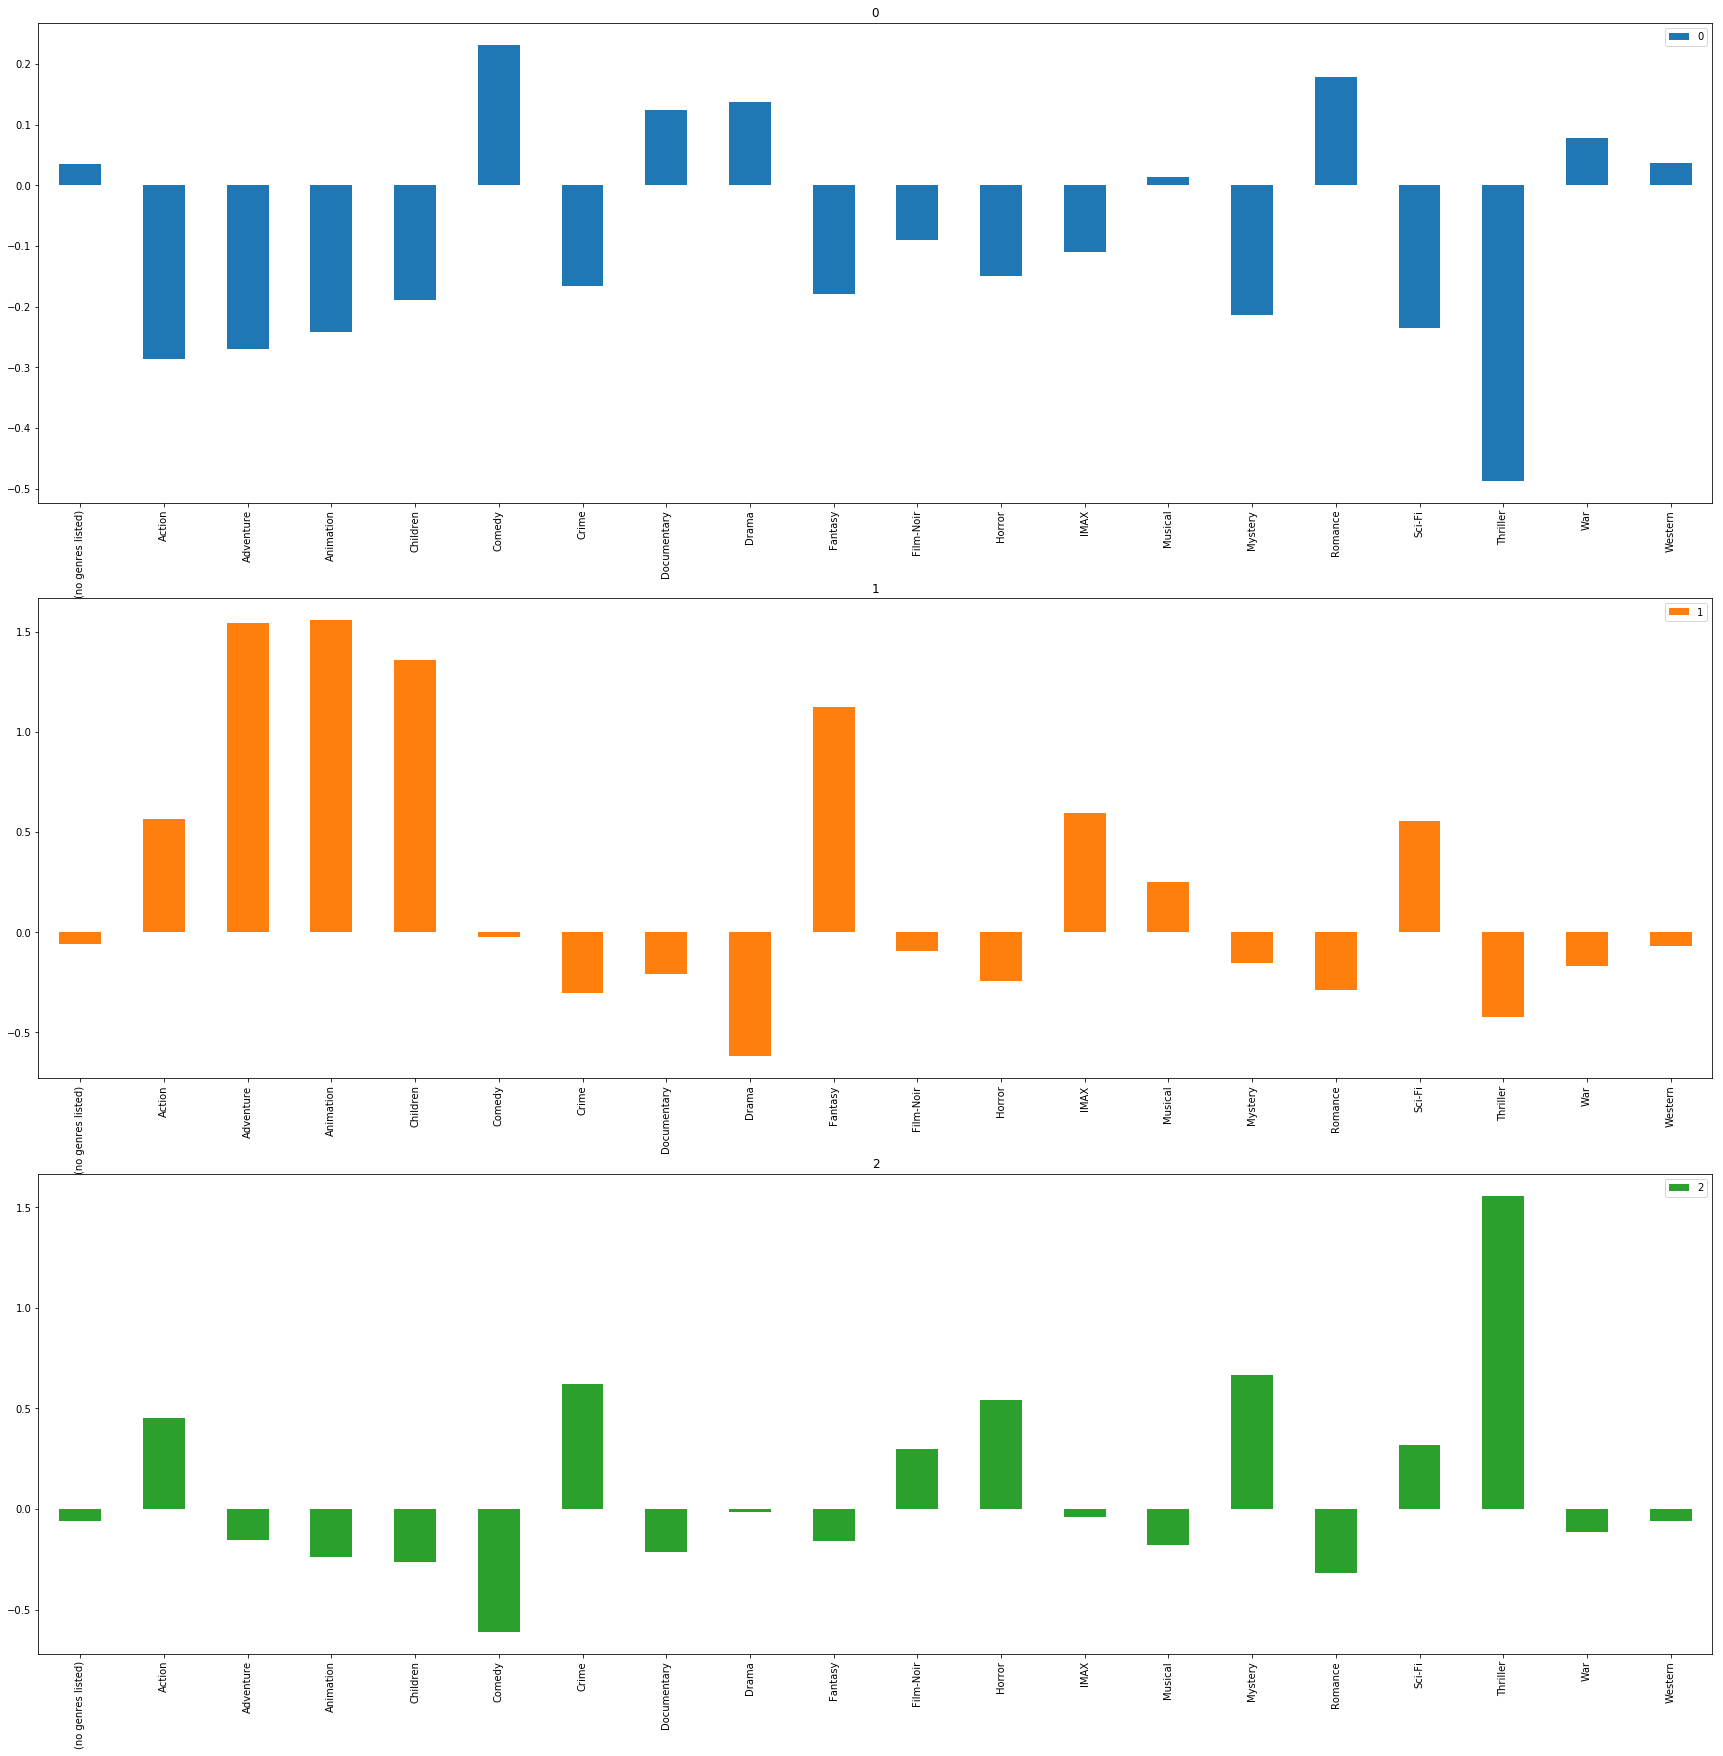

In [12]:
grupos = pandas.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False)

In [6]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2822,3770,Dreamscape (1984),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2349,3107,Backdraft (1991),Action|Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7645,88129,Drive (2011),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4139,5954,25th Hour (2002),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
937,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,1608,Air Force One (1997),Action|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2821,3769,Thunderbolt and Lightfoot (1974),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8793,129937,Run All Night (2015),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8138,101884,Dark Tide (2012),Adventure|Drama|Thriller,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9088,143365,The Circle (2016),Drama|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [7]:
# O TSNE é para redução de dimensionalidade
from sklearn.manifold import TSNE

# Passa de 20 para 2 dimensões, porém perdemos informações
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-44.83461  , -54.530994 ],
       [ 50.151497 ,  54.99529  ],
       [-27.758612 , -42.324234 ],
       ...,
       [ 18.651209 ,  -2.9238603],
       [ -5.6098914, -50.161068 ],
       [-21.865742 ,  12.36282  ]], dtype=float32)

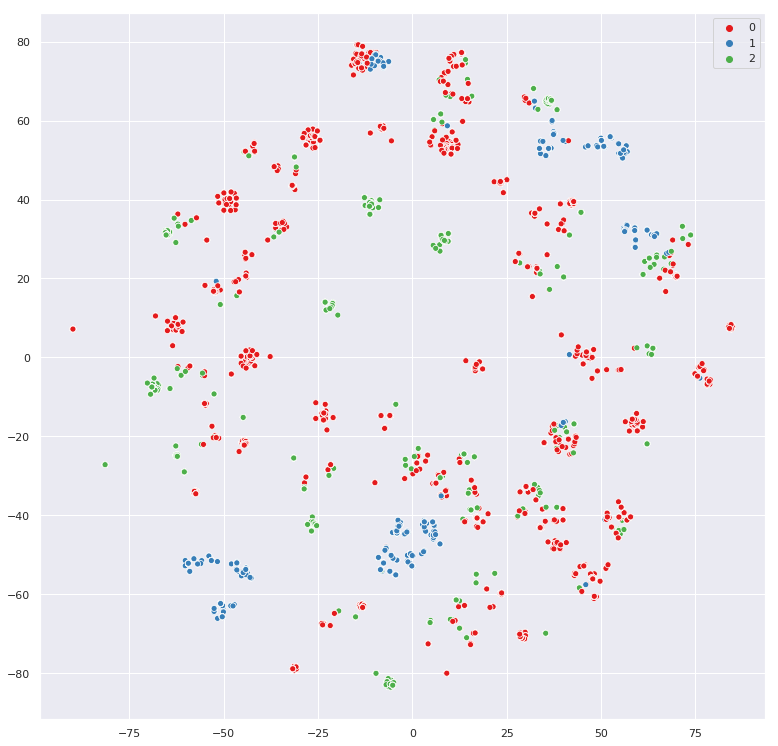

In [8]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(
    x=visualizacao[:, 0], 
    y=visualizacao[:,1], 
    hue=modelo.labels_,
    palette=sns.color_palette('Set1',3)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23e80655c0>,
      dtype=object)

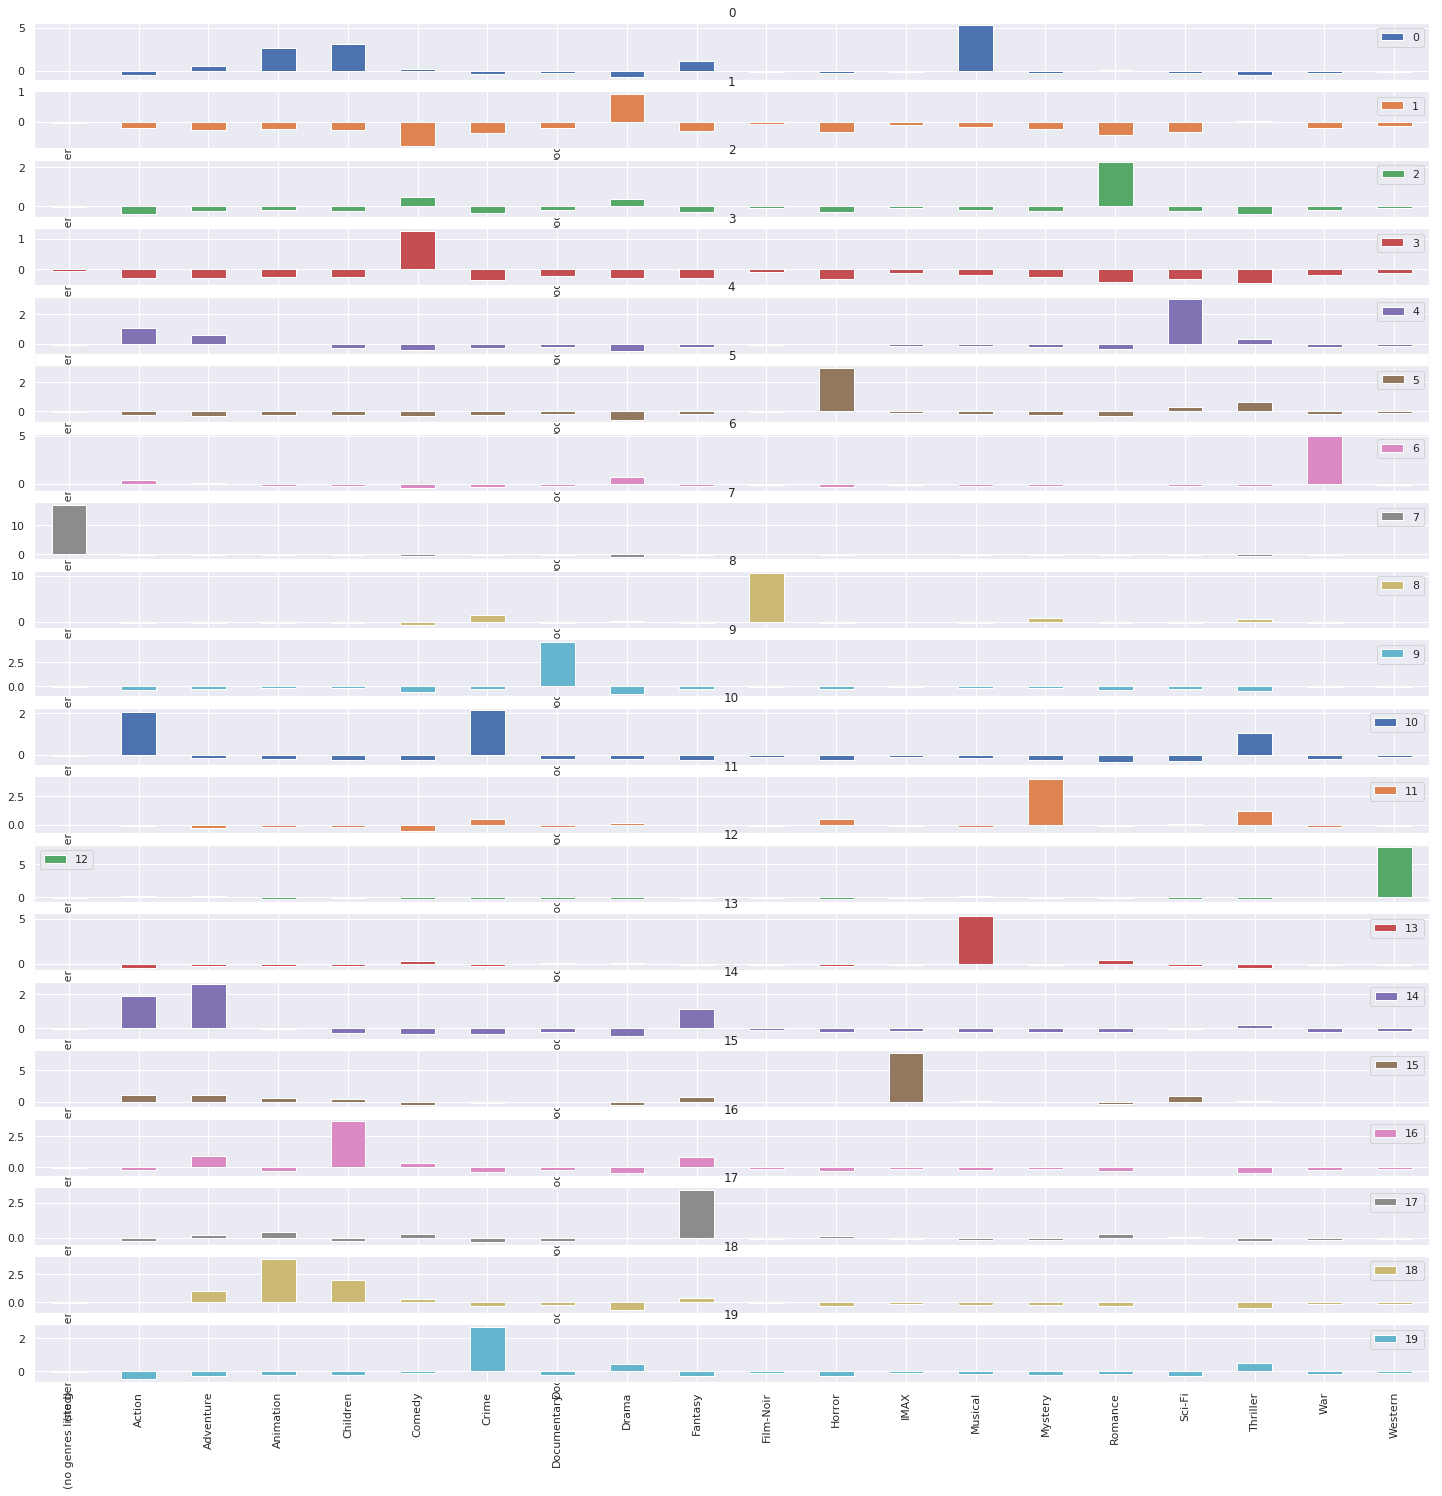

In [9]:
modelo = KMeans(n_clusters=20) # 20 centroides
modelo.fit(generos_escalados) # Treinamento

#Dataframe com os clusters (centroides)
grupos = pandas.DataFrame(
    modelo.cluster_centers_,
    columns = generos.columns
)

grupos.head()

#O transpose faz a transposição de x e y
grupos.transpose().plot.bar(
    subplots = True,
    figsize = (25,25),
    sharex = False
)

In [10]:
# Função para verificar o erro baseado nos clusters

def kmeans(nclusters, generos):
    modelo = KMeans(n_clusters = nclusters)
    modelo.fit(generos)
    return [nclusters, modelo.inertia_]

kmeans(20, generos_escalados)

resultado = [kmeans(i, generos_escalados) for i in range(1,41)]


In [34]:
resultado = pandas.DataFrame(resultado, columns=['grupos', 'inertia'])

resultado.head()

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166449.035457
3,4,157776.187064
4,5,147426.514224


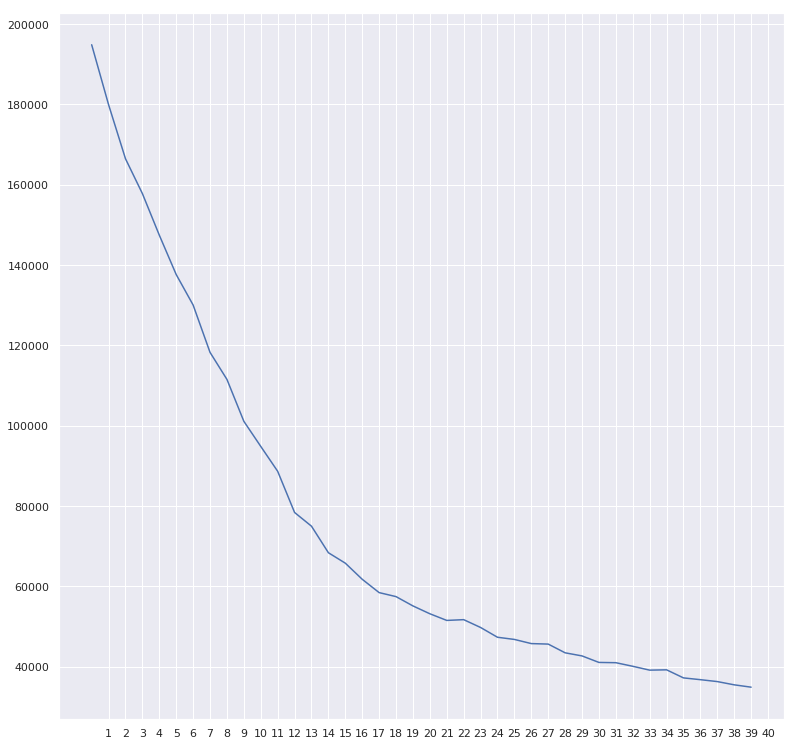

In [12]:
resultado.inertia.plot(xticks = resultado.grupos)
#elbow method > 17

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23da173d68>,
      dtype=object)

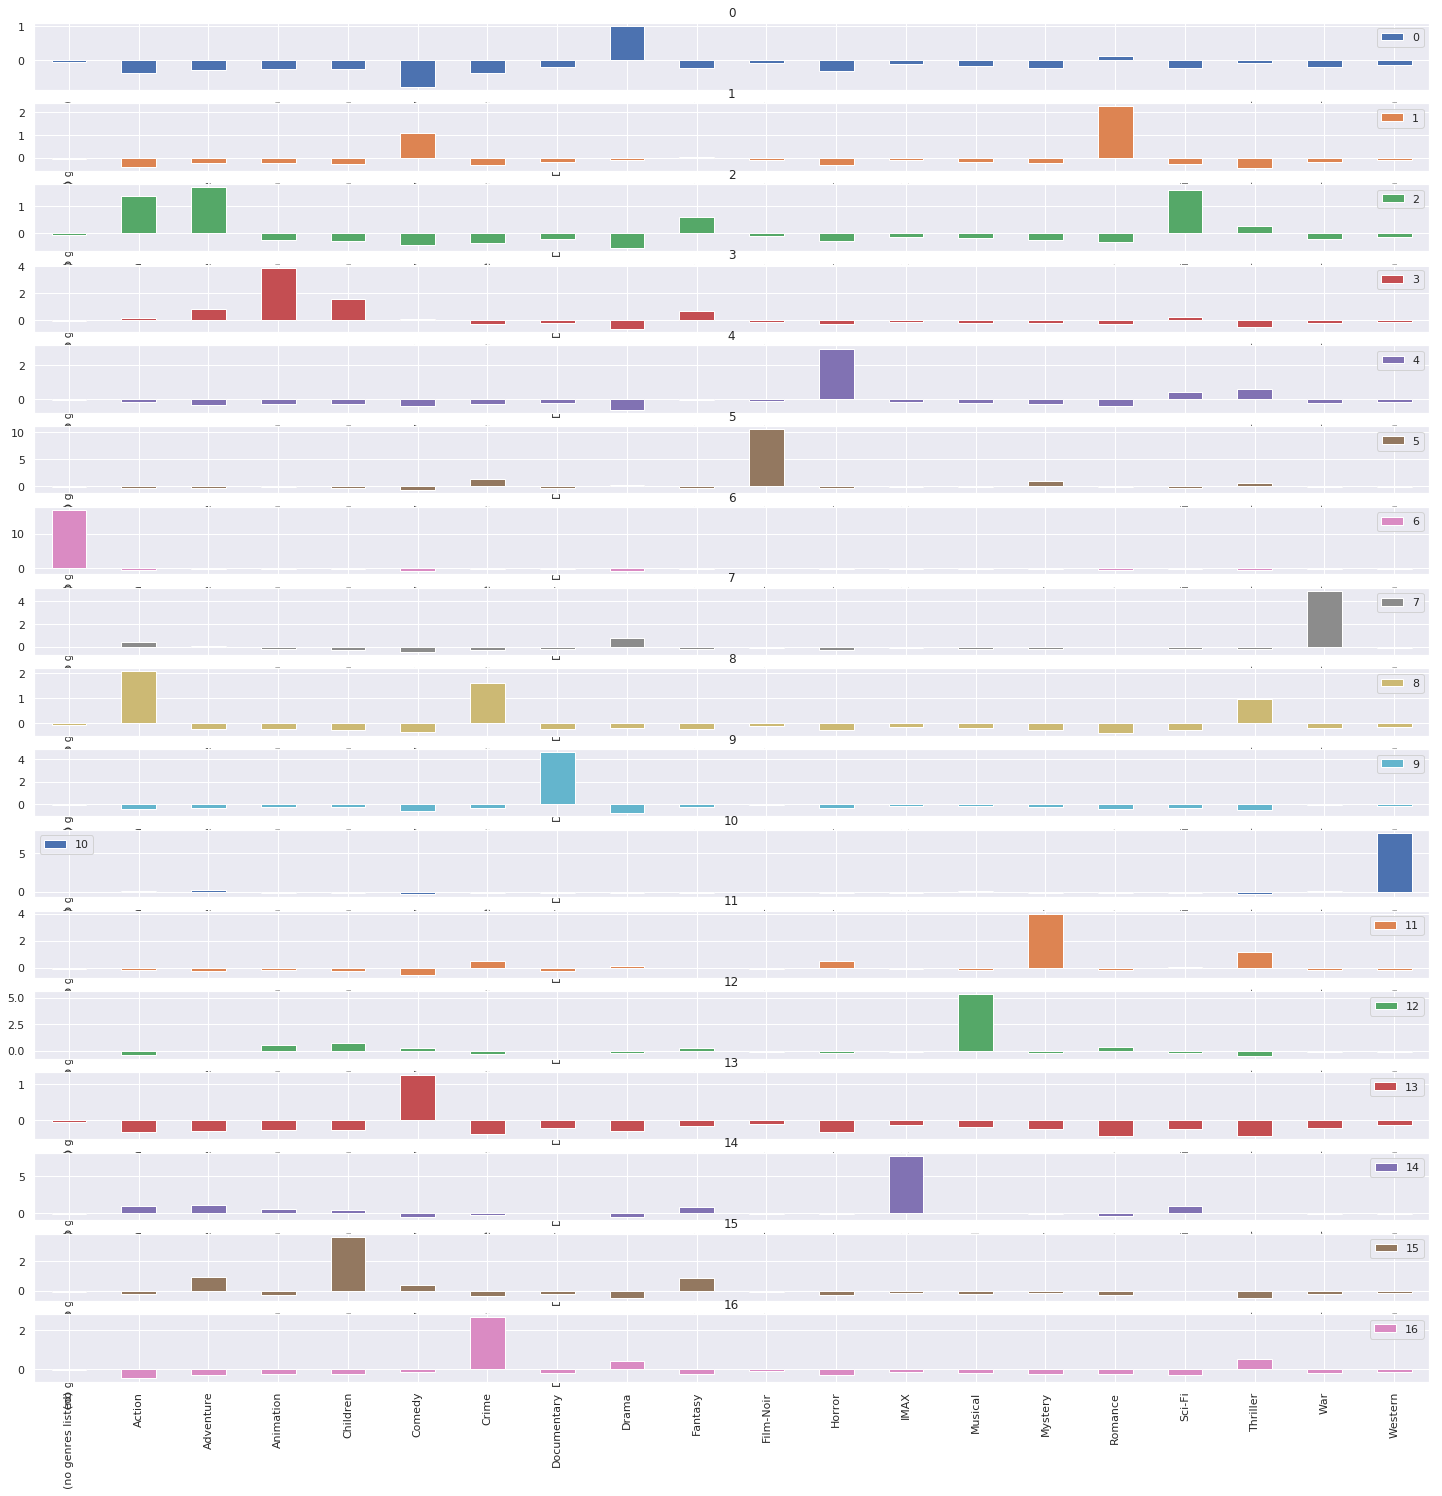

In [13]:
modelo = KMeans(n_clusters=17) # 17 centroides, de acordo com as otimizações
modelo.fit(generos_escalados) # Treinamento

#Dataframe com os clusters (centroides)
grupos = pandas.DataFrame(
    modelo.cluster_centers_,
    columns = generos.columns
)

grupos.head()

#O transpose faz a transposição de x e y
grupos.transpose().plot.bar(
    subplots = True,
    figsize = (25,25),
    sharex = False
)


In [13]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)

# Treinando os modelos e retorna as labels
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [15]:
# Criando um gráfico de dispersão (reduz dimensão)
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-35.113365  , -40.134327  ],
       [-49.805428  ,  33.897808  ],
       [ 49.594788  , -14.3162565 ],
       ...,
       [ 22.052275  ,   0.35405496],
       [-48.32043   ,   6.66952   ],
       [-15.236022  ,   8.078718  ]], dtype=float32)

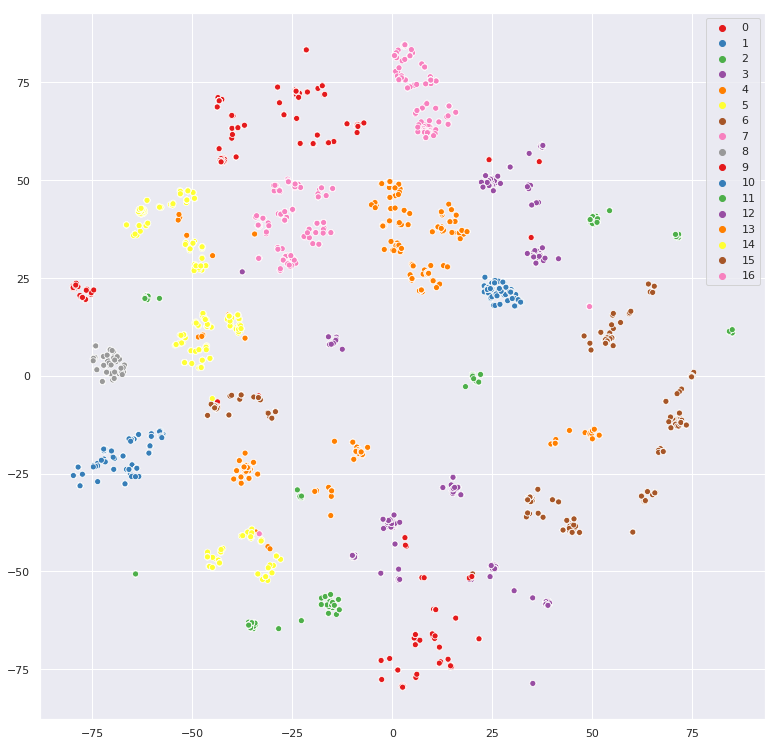

In [16]:
# Plotando com o Seaborn
sns.scatterplot(
    x=visualizacao[:,0], # Todas as linhas e a primeira coluna (0),
    y=visualizacao[:,1], # Todas as linhas e a segunda coluna (1)
    hue=grupos,
    palette=sns.color_palette('Set1',17)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23d1f6b940>,
      dtype=object)

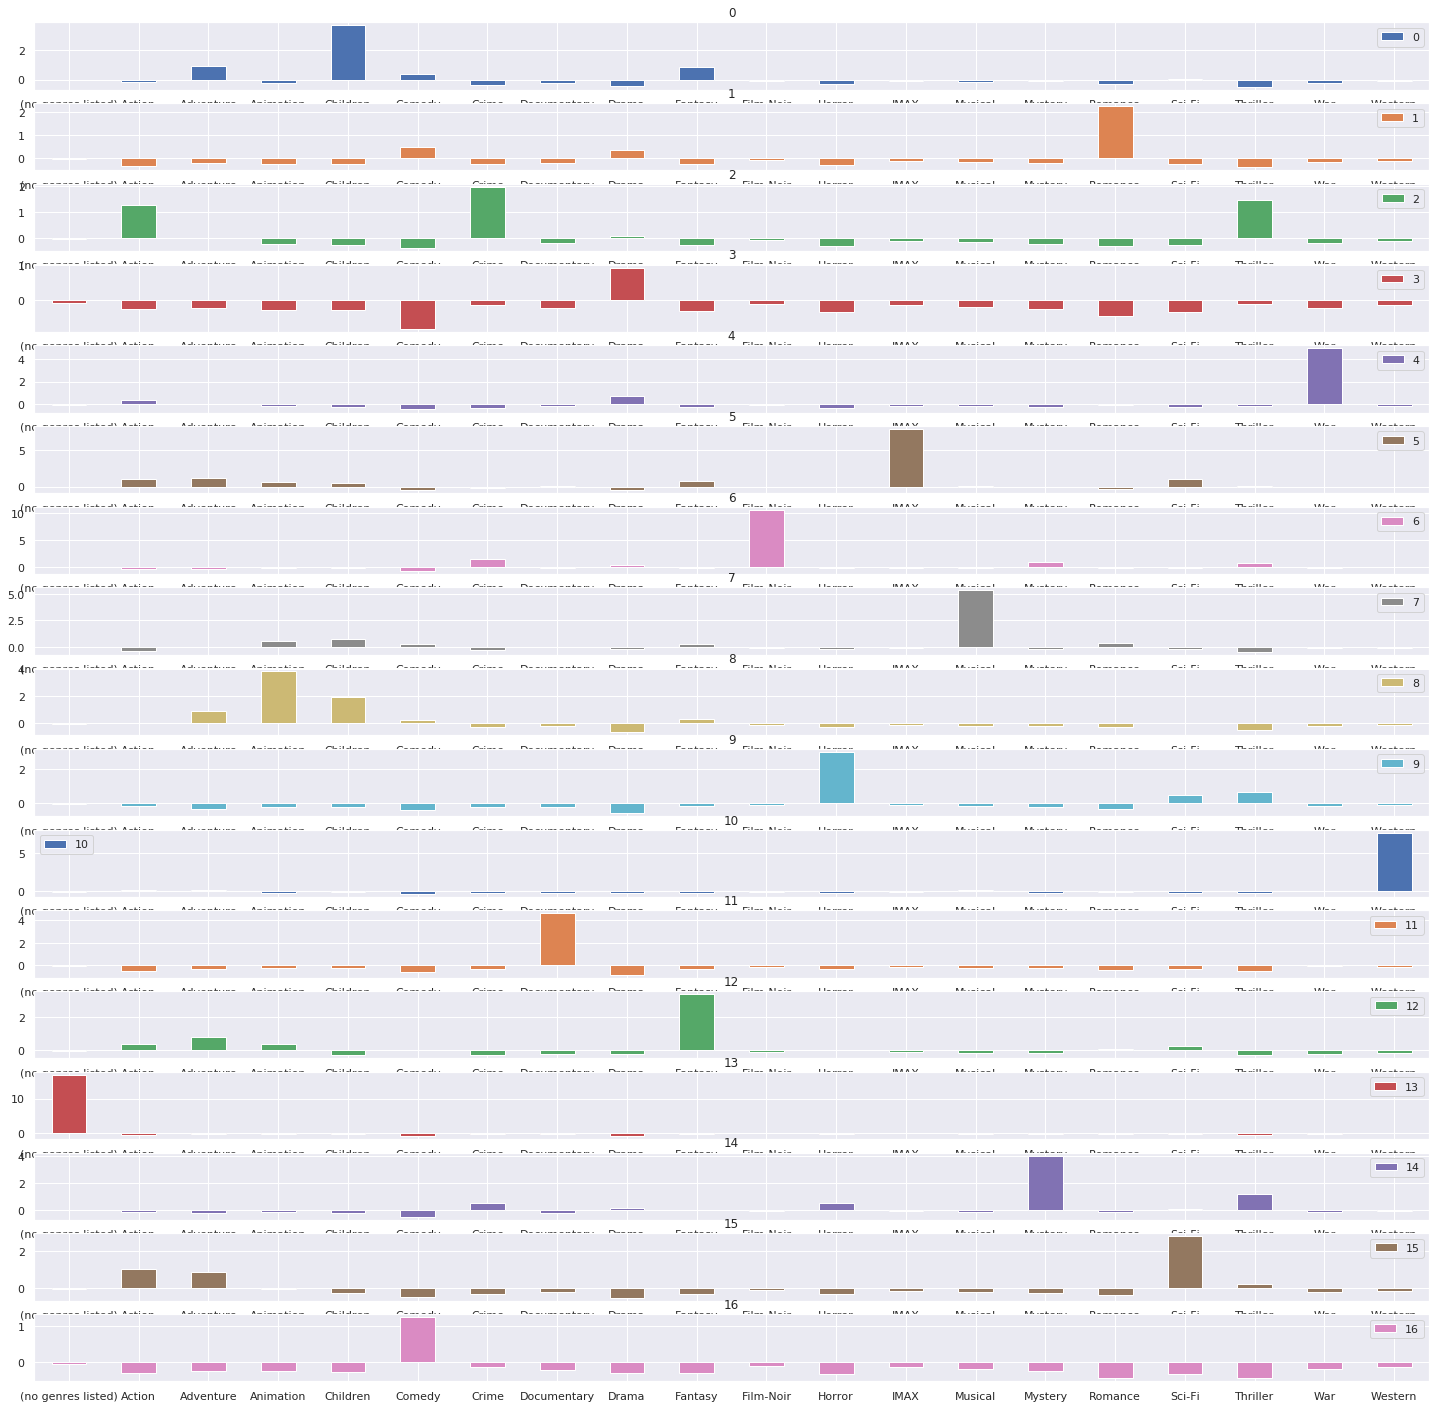

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17) # 17 centroides, de acordo com as otimizações
modelo.fit(generos_escalados) # Treinamento

#Dataframe com os clusters (centroides)
grupos0 = pandas.DataFrame(
    modelo.cluster_centers_,
    columns = generos.columns
)

#O transpose faz a transposição de x e y
grupos0.transpose().plot.bar(
    subplots = True,
    figsize = (25,25),
    sharex = False,
    rot=0
)


In [31]:
# Matriz de distâncias
matriz_de_distancia = linkage(grupos0)
matriz_de_distancia

array([[ 1.        ,  2.        ,  2.46360681,  2.        ],
       [ 7.        , 17.        ,  2.88544674,  3.        ],
       [ 0.        , 18.        ,  3.21905164,  4.        ],
       [13.        , 19.        ,  3.28604979,  5.        ],
       [15.        , 20.        ,  3.39108199,  6.        ],
       [11.        , 21.        ,  3.84784281,  7.        ],
       [16.        , 22.        ,  4.40119796,  8.        ],
       [ 8.        , 23.        ,  4.67955588,  9.        ],
       [14.        , 24.        ,  4.7021991 , 10.        ],
       [10.        , 25.        ,  5.16504348, 11.        ],
       [ 6.        , 26.        ,  5.26035327, 12.        ],
       [ 9.        , 27.        ,  5.82040619, 13.        ],
       [ 5.        , 28.        ,  7.87969535, 14.        ],
       [ 3.        , 29.        ,  8.16328535, 15.        ],
       [12.        , 30.        , 10.81418623, 16.        ],
       [ 4.        , 31.        , 17.06818945, 17.        ]])

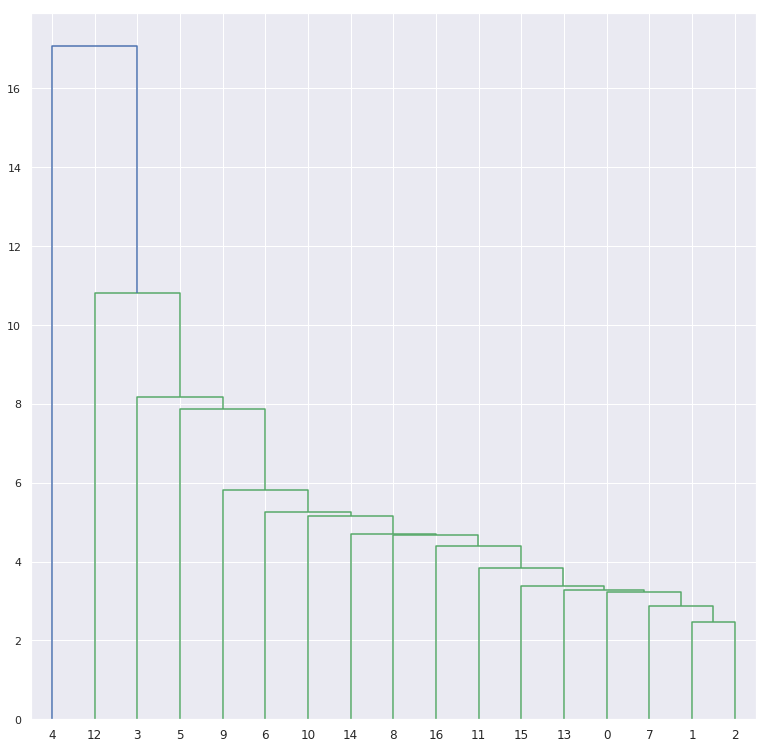

In [32]:
# Plotando o dendrograma
dendrograma = dendrogram(matriz_de_distancia)